<a href="https://colab.research.google.com/github/AngelTroncoso/Costo_Transporte/blob/main/Regresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io

# Datos ficticios de la empresa de transporte
csv_data = """ID_Viaje,Distancia_km,Tiempo_min,Costo_Combustible_USD,Num_Pasajeros,Tipo_Vehiculo,Costo_Total_USD
1,50,60,10.5,2,Camioneta,75.0
2,120,150,25.0,1,Sedan,140.0
3,30,45,6.2,3,Furgoneta,50.0
4,80,90,16.8,2,Sedan,95.0
5,200,240,40.0,4,Camioneta,220.0
6,70,80,14.0,1,Furgoneta,80.0
7,15,25,3.0,2,Sedan,35.0
8,180,210,36.5,3,Camioneta,190.0
9,95,110,19.0,1,Sedan,105.0
10,60,70,12.5,2,Furgoneta,70.0
11,40,55,8.0,3,Camioneta,60.0
12,110,130,22.0,1,Sedan,125.0
13,25,35,5.0,2,Furgoneta,45.0
14,160,190,32.0,3,Camioneta,170.0
15,55,65,11.0,1,Sedan,65.0
16,90,100,18.0,2,Furgoneta,100.0
17,130,160,26.0,3,Camioneta,150.0
18,45,50,9.0,1,Sedan,55.0
19,100,120,20.0,2,Furgoneta,110.0
20,75,85,15.0,3,Camioneta,88.0
"""

df = pd.read_csv(io.StringIO(csv_data))
print("Primeras 5 filas del DataFrame:")
print(df.head())
print("\nInformación del DataFrame:")
df.info()

Primeras 5 filas del DataFrame:
   ID_Viaje  Distancia_km  Tiempo_min  Costo_Combustible_USD  Num_Pasajeros  \
0         1            50          60                   10.5              2   
1         2           120         150                   25.0              1   
2         3            30          45                    6.2              3   
3         4            80          90                   16.8              2   
4         5           200         240                   40.0              4   

  Tipo_Vehiculo  Costo_Total_USD  
0     Camioneta             75.0  
1         Sedan            140.0  
2     Furgoneta             50.0  
3         Sedan             95.0  
4     Camioneta            220.0  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Viaje               20 non-null     int64

In [2]:
# Convertir 'Tipo_Vehiculo' a variables dummy (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Tipo_Vehiculo'], drop_first=True)
print("\nDataFrame después de One-Hot Encoding:")
print(df.head())


DataFrame después de One-Hot Encoding:
   ID_Viaje  Distancia_km  Tiempo_min  Costo_Combustible_USD  Num_Pasajeros  \
0         1            50          60                   10.5              2   
1         2           120         150                   25.0              1   
2         3            30          45                    6.2              3   
3         4            80          90                   16.8              2   
4         5           200         240                   40.0              4   

   Costo_Total_USD  Tipo_Vehiculo_Furgoneta  Tipo_Vehiculo_Sedan  
0             75.0                    False                False  
1            140.0                    False                 True  
2             50.0                     True                False  
3             95.0                    False                 True  
4            220.0                    False                False  


In [3]:
# Definir características (X) y variable objetivo (y)
# Excluimos 'ID_Viaje' ya que no es una característica predictiva
X = df.drop(['ID_Viaje', 'Costo_Total_USD'], axis=1)
y = df['Costo_Total_USD']

print("\nCaracterísticas (X):")
print(X.head())
print("\nVariable Objetivo (y):")
print(y.head())


Características (X):
   Distancia_km  Tiempo_min  Costo_Combustible_USD  Num_Pasajeros  \
0            50          60                   10.5              2   
1           120         150                   25.0              1   
2            30          45                    6.2              3   
3            80          90                   16.8              2   
4           200         240                   40.0              4   

   Tipo_Vehiculo_Furgoneta  Tipo_Vehiculo_Sedan  
0                    False                False  
1                    False                 True  
2                     True                False  
3                    False                 True  
4                    False                False  

Variable Objetivo (y):
0     75.0
1    140.0
2     50.0
3     95.0
4    220.0
Name: Costo_Total_USD, dtype: float64


In [4]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
# 80% para entrenamiento, 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTamaño del conjunto de entrenamiento X: {X_train.shape}")
print(f"Tamaño del conjunto de prueba X: {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento y: {y_train.shape}")
print(f"Tamaño del conjunto de prueba y: {y_test.shape}")


Tamaño del conjunto de entrenamiento X: (16, 6)
Tamaño del conjunto de prueba X: (4, 6)
Tamaño del conjunto de entrenamiento y: (16,)
Tamaño del conjunto de prueba y: (4,)


In [5]:
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

print("\nModelo de Regresión Lineal entrenado.")


Modelo de Regresión Lineal entrenado.


In [6]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

print("\nPredicciones realizadas en el conjunto de prueba.")
print("Primeras 5 predicciones:", y_pred[:5])
print("Valores reales correspondientes:", y_test.head().tolist())


Predicciones realizadas en el conjunto de prueba.
Primeras 5 predicciones: [ 63.18042635  56.21707927  97.63666433 137.67963736]
Valores reales correspondientes: [75.0, 55.0, 100.0, 140.0]


In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Raíz del Error Cuadrático Medio
r2 = r2_score(y_test, y_pred)

print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

# Opcional: Mostrar los coeficientes del modelo
print("\nCoeficientes del modelo:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intersección (Bias): {model.intercept_:.2f}")


Error Cuadrático Medio (MSE): 38.04
Raíz del Error Cuadrático Medio (RMSE): 6.17
Coeficiente de Determinación (R^2): 0.96

Coeficientes del modelo:
Distancia_km: 0.15
Tiempo_min: 0.64
Costo_Combustible_USD: 0.35
Num_Pasajeros: 2.59
Tipo_Vehiculo_Furgoneta: -0.05
Tipo_Vehiculo_Sedan: 3.35
Intersección (Bias): 8.03


Interpretación de los Resultados:  
MSE (Mean Squared Error) y RMSE (Root Mean Squared Error): Indican la magnitud promedio de los errores del modelo. Valores más bajos son mejores. El RMSE es más interpretable porque está en las mismas unidades que la variable objetivo (Costo_Total_USD).  

R² (R-squared): Representa la proporción de la varianza en la variable dependiente (Costo_Total_USD) que es predecible a partir de las variables independientes (características). Un valor de 1.0 indica que el modelo explica toda la varianza de la variable objetivo, mientras que un valor de 0.0 indica que no explica ninguna varianza. Cuanto más cerca de 1, mejor es el ajuste del modelo.  

Coeficientes: Muestran la relación entre cada característica y la variable objetivo. Por ejemplo, un coeficiente de 1.5 para Distancia_km significaría que por cada kilómetro adicional, el Costo_Total_USD aumenta en $1.5 (manteniendo otras características constantes).  

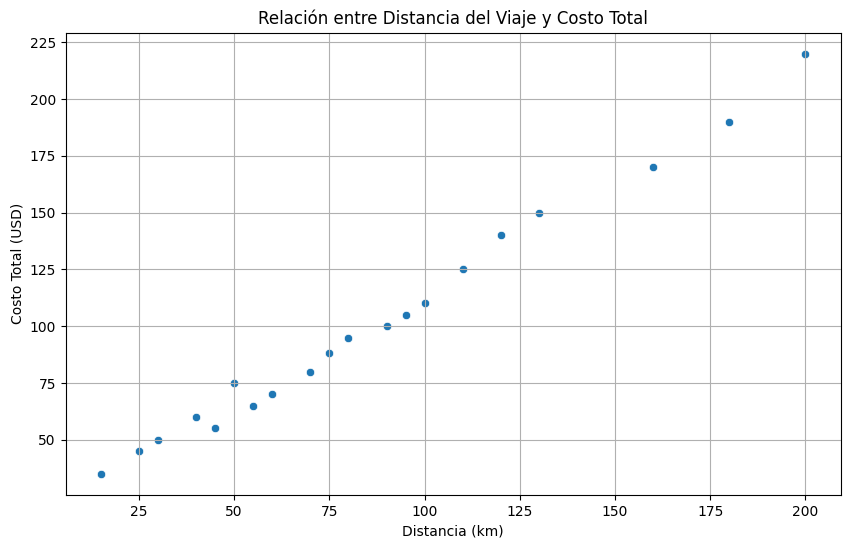

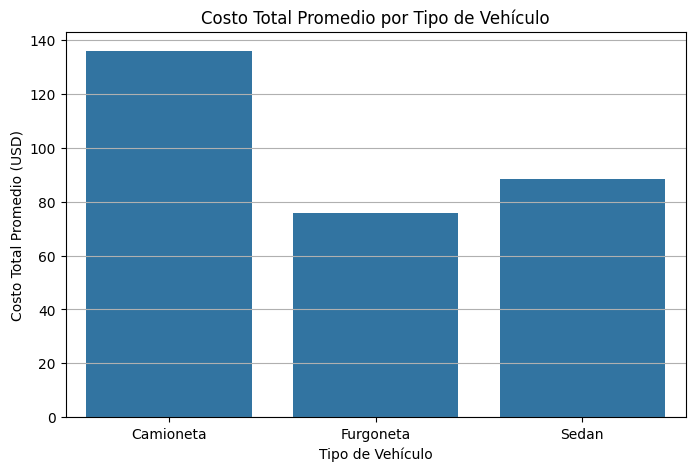

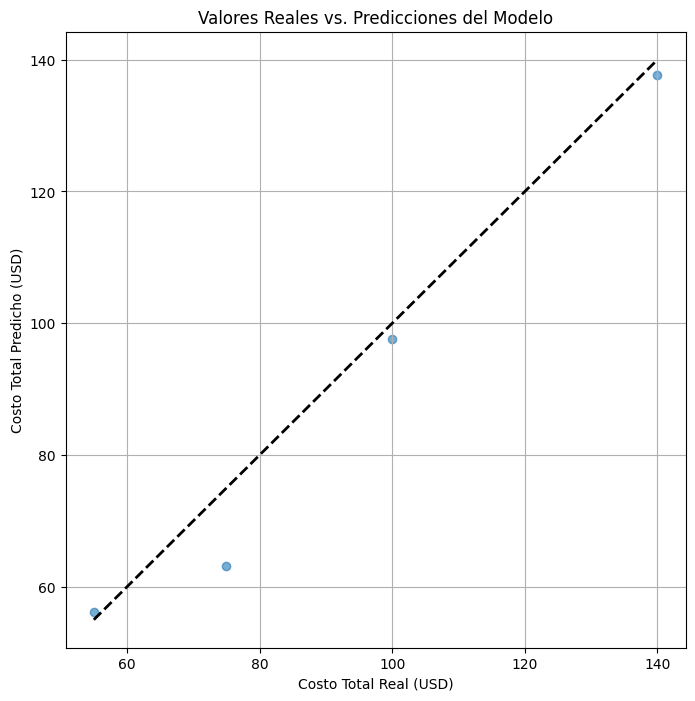

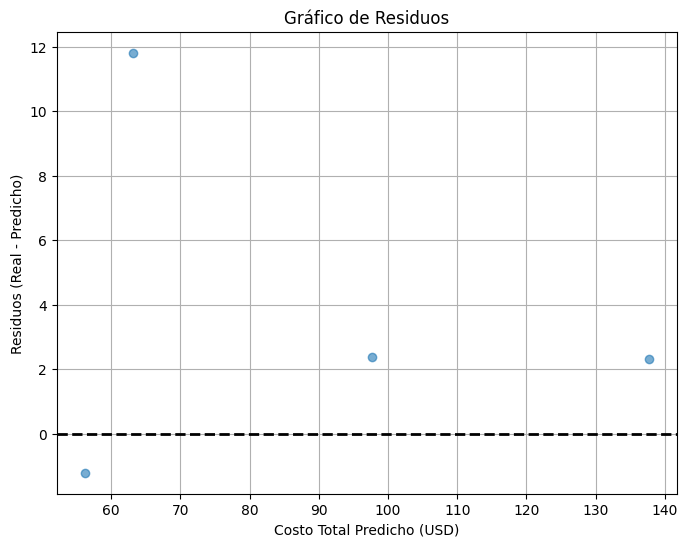

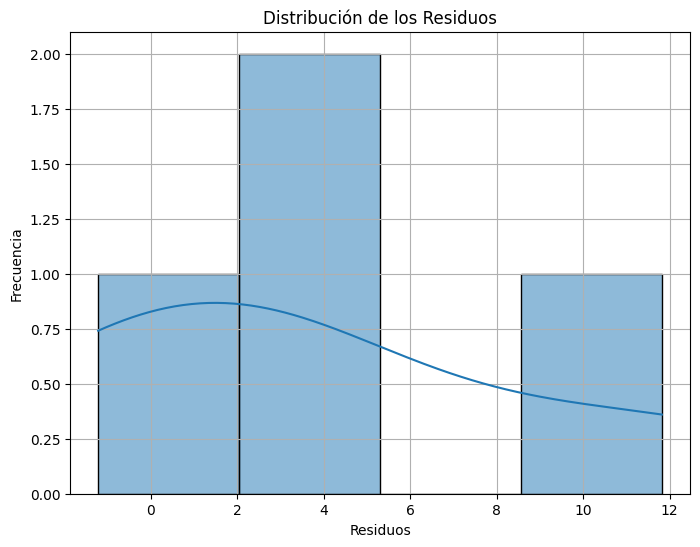

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión entre 'Distancia_km' y 'Costo_Total_USD'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distancia_km', y='Costo_Total_USD', data=df)
plt.title('Relación entre Distancia del Viaje y Costo Total')
plt.xlabel('Distancia (km)')
plt.ylabel('Costo Total (USD)')
plt.grid(True)
plt.show()

# Gráfico de barras para el costo total promedio por tipo de vehículo
# Primero, necesitamos el dataframe original con la columna Tipo_Vehiculo no dummy
df_original = pd.read_csv(io.StringIO(csv_data))
avg_cost_by_vehicle = df_original.groupby('Tipo_Vehiculo')['Costo_Total_USD'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Tipo_Vehiculo', y='Costo_Total_USD', data=avg_cost_by_vehicle)
plt.title('Costo Total Promedio por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Costo Total Promedio (USD)')
plt.grid(axis='y')
plt.show()

# Gráfico de dispersión de los valores reales vs. predichos en el conjunto de prueba
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea de referencia y=x
plt.xlabel('Costo Total Real (USD)')
plt.ylabel('Costo Total Predicho (USD)')
plt.title('Valores Reales vs. Predicciones del Modelo')
plt.grid(True)
plt.show()

# Gráfico de residuos (errores) vs. valores predichos
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Costo Total Predicho (USD)')
plt.ylabel('Residuos (Real - Predicho)')
plt.title('Gráfico de Residuos')
plt.grid(True)
plt.show()

# Distribución de los residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos')
plt.grid(True)
plt.show()
